In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
##Read the AirBnb Data
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df["neighbourhood group"]=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


Clean the Data

In [7]:
# Initial Cleaning: Drop duplicates and unnecessary columns
df.drop_duplicates(inplace=True)
df.drop(columns=['house_rules', 'license'], inplace=True)

# Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean and Convert Currency Columns Robustly
# This block handles text, removes '$' and ',', and converts to a number in one go.
for col in ['price', 'service_fee']:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(r'[$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle All Missing Values
df.dropna(inplace=True)

# Convert Columns to Final Correct Data Types
df['price'] = df['price'].astype(float)
df['service_fee'] = df['service_fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction_year'] = df['construction_year'].astype(int)

# Correct Spelling in Categorical Data
df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

df = df[df['availability_365'] <= 365]

# Rename Columns as Originally Intended
df.rename(columns={
    'price': 'price_$',
    'service_fee': 'service_fee_$'
}, inplace=True)

# Final Check
print("Data cleaning complete!")
print(df.head())
print("\nData Types:")
df.info()


Data cleaning complete!
        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
7  1005202                                   BlissArtsSpace!  90821839709   
8  1005754                   Large Furnished Room Near B'way  79384379533   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington   
1               verified     Jenna           Manhattan             Midtown   
4               verified    Lyndon           Manhattan         East Harlem   
7            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
8               verified    Evelyn           Manhattan      Hell's Kitchen   

        lat      long        country  ... co

In [8]:
df.duplicated().value_counts()

,count
False,81242


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81242 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81242 non-null  object        
 1   name                            81242 non-null  object        
 2   host_id                         81242 non-null  object        
 3   host_identity_verified          81242 non-null  object        
 4   host_name                       81242 non-null  object        
 5   neighbourhood_group             81242 non-null  object        
 6   neighbourhood                   81242 non-null  object        
 7   lat                             81242 non-null  float64       
 8   long                            81242 non-null  float64       
 9   country                         81242 non-null  object        
 10  country_code                    81242 non-null  object        
 11  instan

In [10]:
df.describe()

,lat,long,instant_bookable,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,81242.000000,81242.000000,81242.000000,81242.00000,81242.000000,81242.000000,81242.000000,81242.000000,81242,81242.000000,81242.000000,81242.000000,81242.000000
mean,40.727256,-73.948263,0.497464,2012.48987,626.625760,125.326211,7.418047,32.010303,2019-06-21 03:51:10.027817984,1.390924,3.286305,7.106792,135.037148
min,40.504560,-74.249840,0.000000,2003.00000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982070,0.000000,2007.00000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721250,-73.953590,0.000000,2012.00000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930480,1.000000,2017.00000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.00000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056391,0.050625,0.499997,5.76077,331.762832,66.355878,28.366255,51.665773,NaN,1.761280,1.278717,29.854202,128.464648


What are the different property types in the Dataset?

In [11]:
property_types = df['room_type'].value_counts().to_frame()
property_types

,count
room_type,
Entire home/apt,42930
Private room,36590
Shared room,1614
Hotel room,108


Room type count plotted on a barchart

/tmp/ipython-input-3710624249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='viridis')


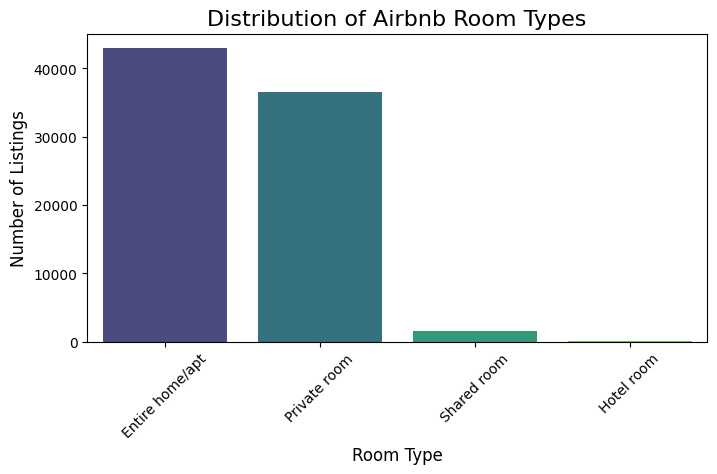

In [12]:
# Create the figure and axes objects
plt.figure(figsize=(8, 4))

# Create the bar chart using seaborn's countplot
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='viridis')

# Adding a title and labels
plt.title('Distribution of Airbnb Room Types', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# Rotate x-axis labels for better readability if they are long
plt.xticks(rotation=45)
plt.show()

Which neighborhood group has the highest number of listings?

In [13]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group



,count
neighbourhood_group,
Brooklyn,33709
Manhattan,33541
Queens,10946
Bronx,2241
Staten Island,805


The neighborhood group with the highest number of listings is: Brooklyn
Number of listings: 33709


/tmp/ipython-input-159382820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='plasma')


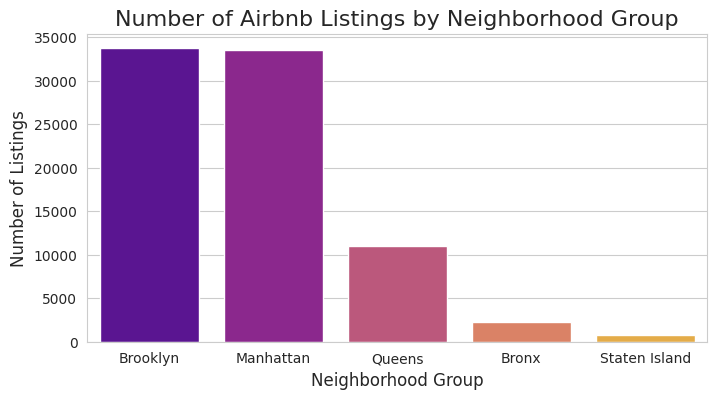

In [14]:
neighborhood_counts = df['neighbourhood_group'].value_counts()
top_neighborhood = neighborhood_counts.idxmax()

print(f"The neighborhood group with the highest number of listings is: {top_neighborhood}")
print(f"Number of listings: {neighborhood_counts.max()}")

sns.set_style('whitegrid')

plt.figure(figsize=(8, 4))

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='plasma')

# Add a title and labels
plt.title('Number of Airbnb Listings by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.show()

Which neighborhood group have the highest average price for Airbnb listings?

The neighborhood group with the highest average price is: Bronx
Highest average price: $630.43


/tmp/ipython-input-1761495918.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_hood.index, y=avg_price_by_hood.values, palette='magma')


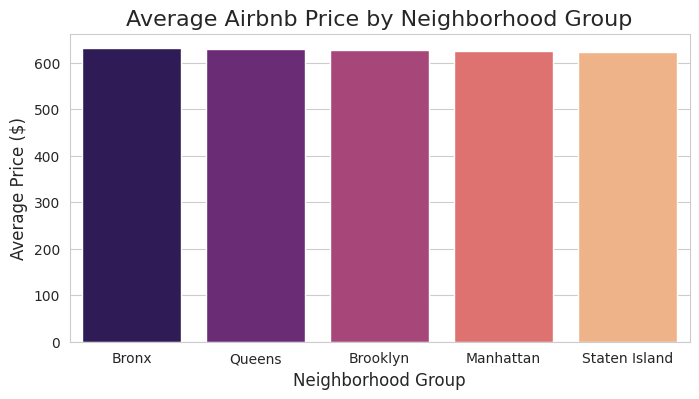

In [15]:
# Group the DataFrame by 'neighbourhood_group' and calculate the mean of 'price_$' for each group
avg_price_by_hood = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False)
top_priced_hood = avg_price_by_hood.idxmax()

highest_avg_price = avg_price_by_hood.max()

print(f"The neighborhood group with the highest average price is: {top_priced_hood}")
print(f"Highest average price: ${highest_avg_price:.2f}")


sns.set_style('whitegrid')

plt.figure(figsize=(8, 4))

sns.barplot(x=avg_price_by_hood.index, y=avg_price_by_hood.values, palette='magma')

plt.title('Average Airbnb Price by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

plt.show()

Is there a relationship between the construction year of property and price?

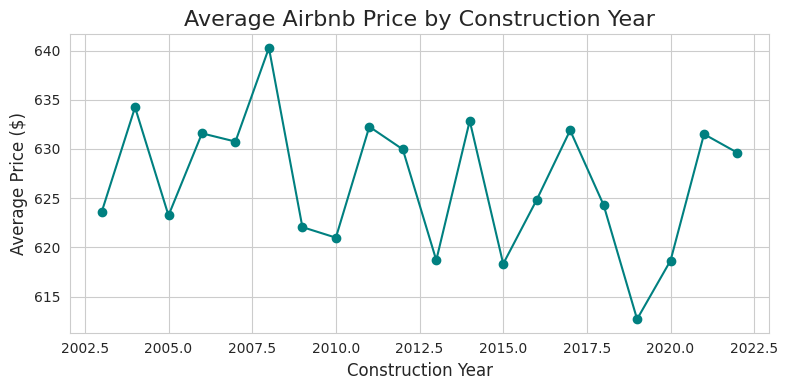

In [16]:
avg_price_by_year = df.groupby('construction_year')['price_$'].mean().sort_index()


plt.figure(figsize=(8, 4))

avg_price_by_year.plot(kind='line', marker='o', linestyle='-', color='teal')

# Adding the corrected labels and a full title
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.title('Average Airbnb Price by Construction Year', fontsize=16)

# Adding a grid for easier reading
plt.grid(True)

plt.tight_layout()
plt.show()

Who are the top 10 hosts by calculated host listing count?

Top 10 Hosts by Number of Listings:
      Host Name  Number of Listings
0       Michael                 700
1         David                 584
2          John                 472
3          Alex                 429
4         Karen                 395
5  Sonder (NYC)                 379
6         Maria                 351
7        Daniel                 347
8         Sarah                 336
9          Anna                 334


/tmp/ipython-input-1743966383.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Listings', y='Host Name', data=top_10_hosts_df, palette='rocket')


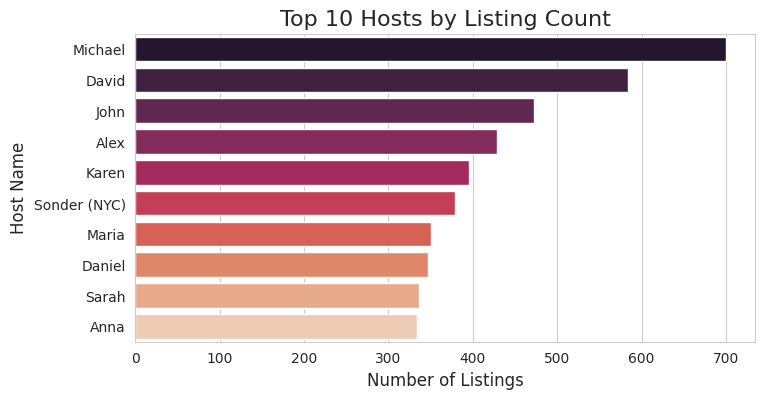

In [17]:
top_10_hosts = df['host_name'].value_counts().head(10)

# Convert the result to a DataFrame for a cleaner display
top_10_hosts_df = top_10_hosts.to_frame().reset_index()
top_10_hosts_df.columns = ['Host Name', 'Number of Listings']

print("Top 10 Hosts by Number of Listings:")
print(top_10_hosts_df)

sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.barplot(x='Number of Listings', y='Host Name', data=top_10_hosts_df, palette='rocket')

# Adding a title and labels
plt.title('Top 10 Hosts by Listing Count', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Host Name', fontsize=12)

plt.show()


Are hosts with verified identities more likely to receive positive reviews?

In [18]:
avg_review_by_verification = df.groupby('host_identity_verified')['review_rate_number'].mean()

print("Average Review Score by Host Verification Status:")
print(avg_review_by_verification.to_frame())

Average Review Score by Host Verification Status:
                        review_rate_number
host_identity_verified                    
unconfirmed                       3.282883
verified                          3.289726


/tmp/ipython-input-3104449058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review_by_verification.index, y=avg_review_by_verification.values, palette='coolwarm')


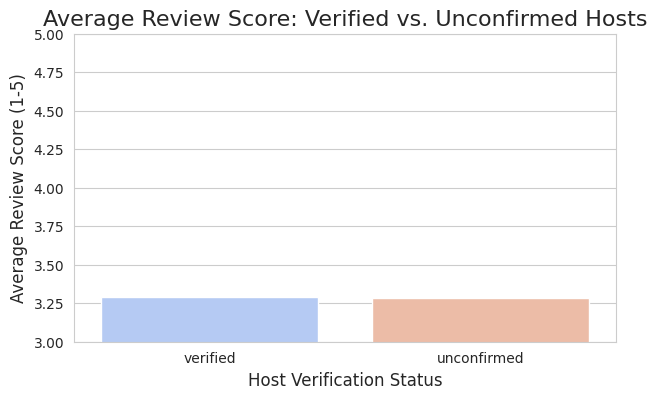

In [19]:
avg_review_by_verification = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False)

sns.set_style('whitegrid')

plt.figure(figsize=(7, 4))
sns.barplot(x=avg_review_by_verification.index, y=avg_review_by_verification.values, palette='coolwarm')

# Adding a title and labels
plt.title('Average Review Score: Verified vs. Unconfirmed Hosts', fontsize=16)
plt.xlabel('Host Verification Status', fontsize=12)
plt.ylabel('Average Review Score (1-5)', fontsize=12)

plt.ylim(3, 5)
plt.show()

Is there a correlation between the price of a listing and its service fee?

The correlation coefficient between Price and Service Fee is: 1.0000
This indicates a very strong positive linear relationship.


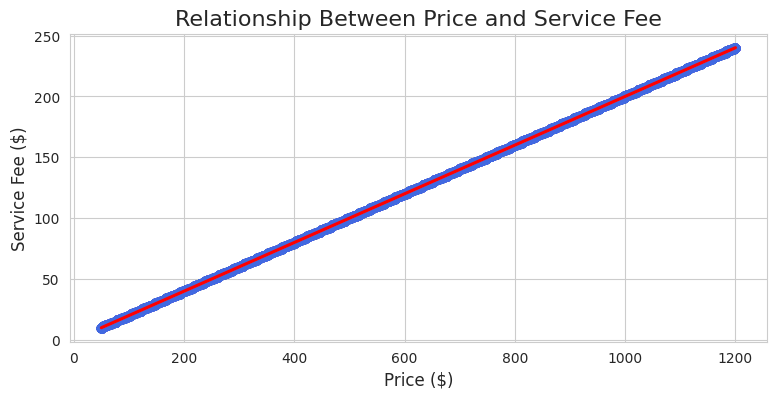

In [20]:
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"The correlation coefficient between Price and Service Fee is: {correlation:.4f}")

if correlation > 0.8:
    print("This indicates a very strong positive linear relationship.")
elif correlation > 0.6:
    print("This indicates a strong positive linear relationship.")
else:
    print("The relationship is moderate to weak.")

sns.set_style('whitegrid')

plt.figure(figsize=(9, 4))

sns.regplot(x='price_$', y='service_fee_$', data=df,
            scatter_kws={'alpha':0.4, 'color': 'royalblue'},
            line_kws={'color':'red'})

# Adding a title and labels
plt.title('Relationship Between Price and Service Fee', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Service Fee ($)', fontsize=12)
plt.show()

What is the average review rate number for listings, and does it vary based on the neighborhood group and room type?

The overall average review rate number for all listings is: 3.29
----------------------------------------------------------------------
Average Review Rate by Neighborhood Group and Room Type:
room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                       3.378190         NaN      3.315789     3.356322
Brooklyn                    3.251608    3.833333      3.283380     3.327759
Manhattan                   3.274865    3.500000      3.293353     3.269350
Queens                      3.358124    3.750000      3.317546     3.326087
Staten Island               3.326877         NaN      3.490909     3.714286


<Figure size 900x400 with 0 Axes>

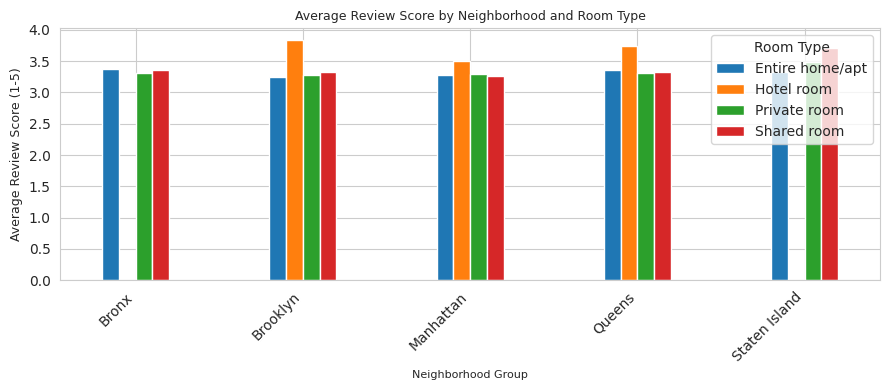

In [21]:
overall_avg_review = df['review_rate_number'].mean()

print(f"The overall average review rate number for all listings is: {overall_avg_review:.2f}")
print("-" * 70)

grouped_reviews = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().unstack()

print("Average Review Rate by Neighborhood Group and Room Type:")
print(grouped_reviews)

sns.set_style('whitegrid')

plt.figure(figsize=(9, 4))
grouped_reviews.plot(kind='bar', figsize=(9, 4), width=0.4)

# Adding a title and labels
plt.title('Average Review Score by Neighborhood and Room Type', fontsize=9)
plt.xlabel('Neighborhood Group', fontsize=8)
plt.ylabel('Average Review Score (1-5)', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

The correlation coefficient between host listings count and availability is: 0.1486
This indicates a very weak or negligible linear relationship.


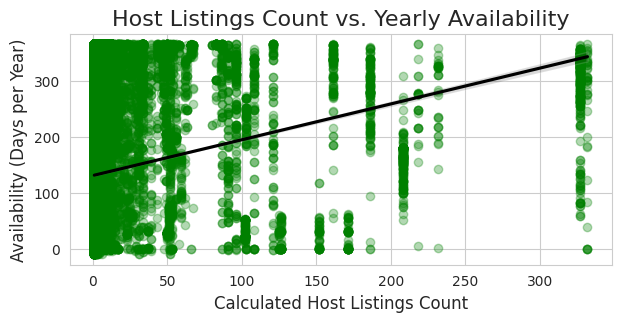

In [22]:
correlation = df['calculated_host_listings_count'].corr(df['availability_365'])

print(f"The correlation coefficient between host listings count and availability is: {correlation:.4f}")

if abs(correlation) < 0.2:
    print("This indicates a very weak or negligible linear relationship.")
elif abs(correlation) < 0.4:
    print("This indicates a weak linear relationship.")
else:
    print("This indicates a moderate to strong linear relationship.")

sns.set_style('whitegrid')

plt.figure(figsize=(7, 3))

sns.regplot(x='calculated_host_listings_count', y='availability_365', data=df,
            scatter_kws={'alpha':0.3, 'color': 'green'},
            line_kws={'color':'black'})

plt.title('Host Listings Count vs. Yearly Availability', fontsize=16)
plt.xlabel('Calculated Host Listings Count', fontsize=12)
plt.ylabel('Availability (Days per Year)', fontsize=12)

plt.show()